<a href="https://colab.research.google.com/github/sunshineluyao/waiting-time-eip1559/blob/main/code/Data_Analyze/Analyze_Data_Sanctioned_Transactions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part I: Set-up

In [1]:

# mount google drive
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# print the current directory
!pwd

/content


In [3]:
#@title path
#create a project folder and identify the path
path = "/content/drive/MyDrive/waitingtime" #@param {type:"string"}


In [4]:
#go to your project folder 
%cd /content/drive/MyDrive/waitingtime

/content/drive/MyDrive/waitingtime


In [5]:
# print the current directory again to make sure that you are in the project folder
!pwd  

/content/drive/MyDrive/waitingtime


In [6]:
import pandas as pd
import numpy as np

# Part II: Identify Delay for All the Transactions

In [7]:
transaction_merge = pd.read_pickle("transaction.pkl")
transaction_merge

,hash,nonce,block_hash,block_number,transaction_index,from_address,to_address,value,gas,gas_price,input,block_timestamp,max_fee_per_gas,max_priority_fee_per_gas,transaction_type
0,0x40f1e852976292130317eb7fdd5ca20ce9f1471d0903...,44918191,0x5c69aec2e3dafde0931b5532345bcfaaf19c18b5d635...,15467393,0,0xea674fdde714fd979de3edf0f56aa9716b898ec8,0xd591cac9a057fe68ebcfbbcbfeb54fa43d8852ae,7949746908430439,250000,16206420881,0x,1662235839,3.086903e+10,1.000000e+09,2
1,0xa02c8132fe4f7a7d6e4c4ecd1e10628b12897751f8df...,44918192,0x5c69aec2e3dafde0931b5532345bcfaaf19c18b5d635...,15467393,1,0xea674fdde714fd979de3edf0f56aa9716b898ec8,0x056ce5403eb0968c7c9a53c644381f179fc1bb60,98332563625038289,250000,16206420881,0x,1662235839,3.086903e+10,1.000000e+09,2
2,0x8cc5c32c2077a37080d9a353ab41e0e140bb1f0e5309...,44918193,0x5c69aec2e3dafde0931b5532345bcfaaf19c18b5d635...,15467393,2,0xea674fdde714fd979de3edf0f56aa9716b898ec8,0x32c89df4793def4287db53c98aa244c3444d0b6d,52501523419871232,250000,16206420881,0x,1662235839,3.086903e+10,1.000000e+09,2
3,0x478c574a8381755334faeba48a021ae1a37c6541833d...,19904,0x5c69aec2e3dafde0931b5532345bcfaaf19c18b5d635...,15467393,3,0x1b2827c3a09993366b8a328685614f03ebebceec,0x5b52bfb8062ce664d74bbcd4cd6dc7df53fd7233,0,90000,32450000001,0xa9059cbb0000000000000000000000001860aefd0482...,1662235839,NaN,NaN,0
4,0x32a92b4de0ca11c444c5f32c8e396d659c540b3fa570...,6790738,0x5c69aec2e3dafde0931b5532345bcfaaf19c18b5d635...,15467393,4,0x46340b20830761efd32832a74d7169b29feb9758,0xdac17f958d2ee523a2206206994597c13d831ec7,0,350000,30606380534,0xa9059cbb000000000000000000000000b8b76f7c194a...,1662235839,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23871248,0x532a8f7c563ddec2436ea64856cd6ad40a10310107c1...,107,0x09db39db1158731d06ae7c7de467f96dec2e33caa390...,15607384,153,0x60748a45b5e6b2b06d305eaad5a216e9f0215e57,0xd588b586d61c826a0e87919b3d1a239206d58bf2,0,88534,5168123486,0x75090ebf000000000000000000000000000000000000...,1664072723,8.410607e+09,1.000000e+09,2
23871249,0x40339a748011b4f3f8e6586cf26d9f1a1d885e87f235...,12,0x09db39db1158731d06ae7c7de467f96dec2e33caa390...,15607384,154,0x06c94d39044238562073ca45d523557deb03af0a,0x484b2d4e3f4412830de1e28d0092762b3663b181,1000000000000000,164631,5168123486,0xa0712d68000000000000000000000000000000000000...,1664072723,8.361646e+09,1.000000e+09,2
23871250,0x5c6cc7d75e9898a70878bbdd63f75db081062dbc2b26...,14,0x09db39db1158731d06ae7c7de467f96dec2e33caa390...,15607384,155,0x78c6f856f83c9bbd0e774bc52269e2a5adf0d81b,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,0,58550,5060000000,0xa9059cbb000000000000000000000000c6115b980ce4...,1664072723,NaN,NaN,0
23871251,0xe4ac4926bead6983292077814c9fca540f482fe8efd6...,0,0x09db39db1158731d06ae7c7de467f96dec2e33caa390...,15607384,156,0x50e886130e3987f60b390b0527b978ff708bcfef,0x20f780a973856b93f63670377900c1d2a50a77c4,2000000000000,124730,5000000000,0x5f57685e000000000000000000000000000000000000...,1664072723,5.000000e+09,2.000000e+09,2


In [8]:
wt_merge = pd.read_pickle("wt_merge.pkl")
wt_merge

,delay,included_in_block_num,hash
Unnamed: 0,,,
0,27.836907,15537264,0xca26b540bdf9758048a7b6f1b87f68d026aacc1d3728...
1,15.129070,15537264,0xca83879857f7a842acfa6f0bdc34102e96fac421da60...
2,26.507015,15537264,0xcb06753b5612e7969871d099901acce56d2229e79a50...
3,15.153113,15537264,0xcbcb6a1fcd784b9506a42704be99c39867aedb4be4be...
4,31.125514,15537264,0xcd9cfa9f0c657d28c7104f2ef79a182e9c27900e9216...
...,...,...,...
23006690,30.315089,15537264,0xc6139913227c89c0bbf51097343938c1d567d25a664f...
23006691,30.202935,15537264,0xc7ab2c873673036e5566606ea0989075234c7319d72b...
23006692,18.360427,15537264,0xc7cfd5a141aeafba15fcbed0e5d7ab1a3e3338db8c0c...


In [9]:
transaction_merge_wt = transaction_merge.merge(wt_merge, how="left", left_on="hash", right_on="hash")

In [10]:
transaction_merge_wt

,hash,nonce,block_hash,block_number,transaction_index,from_address,to_address,value,gas,gas_price,input,block_timestamp,max_fee_per_gas,max_priority_fee_per_gas,transaction_type,delay,included_in_block_num
0,0x40f1e852976292130317eb7fdd5ca20ce9f1471d0903...,44918191,0x5c69aec2e3dafde0931b5532345bcfaaf19c18b5d635...,15467393,0,0xea674fdde714fd979de3edf0f56aa9716b898ec8,0xd591cac9a057fe68ebcfbbcbfeb54fa43d8852ae,7949746908430439,250000,16206420881,0x,1662235839,3.086903e+10,1.000000e+09,2,3.112554,15467393.0
1,0xa02c8132fe4f7a7d6e4c4ecd1e10628b12897751f8df...,44918192,0x5c69aec2e3dafde0931b5532345bcfaaf19c18b5d635...,15467393,1,0xea674fdde714fd979de3edf0f56aa9716b898ec8,0x056ce5403eb0968c7c9a53c644381f179fc1bb60,98332563625038289,250000,16206420881,0x,1662235839,3.086903e+10,1.000000e+09,2,3.094761,15467393.0
2,0x8cc5c32c2077a37080d9a353ab41e0e140bb1f0e5309...,44918193,0x5c69aec2e3dafde0931b5532345bcfaaf19c18b5d635...,15467393,2,0xea674fdde714fd979de3edf0f56aa9716b898ec8,0x32c89df4793def4287db53c98aa244c3444d0b6d,52501523419871232,250000,16206420881,0x,1662235839,3.086903e+10,1.000000e+09,2,3.077301,15467393.0
3,0x478c574a8381755334faeba48a021ae1a37c6541833d...,19904,0x5c69aec2e3dafde0931b5532345bcfaaf19c18b5d635...,15467393,3,0x1b2827c3a09993366b8a328685614f03ebebceec,0x5b52bfb8062ce664d74bbcd4cd6dc7df53fd7233,0,90000,32450000001,0xa9059cbb0000000000000000000000001860aefd0482...,1662235839,NaN,NaN,0,3.123005,15467393.0
4,0x32a92b4de0ca11c444c5f32c8e396d659c540b3fa570...,6790738,0x5c69aec2e3dafde0931b5532345bcfaaf19c18b5d635...,15467393,4,0x46340b20830761efd32832a74d7169b29feb9758,0xdac17f958d2ee523a2206206994597c13d831ec7,0,350000,30606380534,0xa9059cbb000000000000000000000000b8b76f7c194a...,1662235839,NaN,NaN,0,-3.777130,15467393.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23871248,0x532a8f7c563ddec2436ea64856cd6ad40a10310107c1...,107,0x09db39db1158731d06ae7c7de467f96dec2e33caa390...,15607384,153,0x60748a45b5e6b2b06d305eaad5a216e9f0215e57,0xd588b586d61c826a0e87919b3d1a239206d58bf2,0,88534,5168123486,0x75090ebf000000000000000000000000000000000000...,1664072723,8.410607e+09,1.000000e+09,2,4.309812,15607384.0
23871249,0x40339a748011b4f3f8e6586cf26d9f1a1d885e87f235...,12,0x09db39db1158731d06ae7c7de467f96dec2e33caa390...,15607384,154,0x06c94d39044238562073ca45d523557deb03af0a,0x484b2d4e3f4412830de1e28d0092762b3663b181,1000000000000000,164631,5168123486,0xa0712d68000000000000000000000000000000000000...,1664072723,8.361646e+09,1.000000e+09,2,3.778053,15607384.0
23871250,0x5c6cc7d75e9898a70878bbdd63f75db081062dbc2b26...,14,0x09db39db1158731d06ae7c7de467f96dec2e33caa390...,15607384,155,0x78c6f856f83c9bbd0e774bc52269e2a5adf0d81b,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,0,58550,5060000000,0xa9059cbb000000000000000000000000c6115b980ce4...,1664072723,NaN,NaN,0,6.781098,15607384.0
23871251,0xe4ac4926bead6983292077814c9fca540f482fe8efd6...,0,0x09db39db1158731d06ae7c7de467f96dec2e33caa390...,15607384,156,0x50e886130e3987f60b390b0527b978ff708bcfef,0x20f780a973856b93f63670377900c1d2a50a77c4,2000000000000,124730,5000000000,0x5f57685e000000000000000000000000000000000000...,1664072723,5.000000e+09,2.000000e+09,2,9.649881,15607384.0


In [11]:
transaction_merge_wt.to_pickle("transaction_merge_wt.pkl")

In [13]:
transaction_merge_wt["merge"]= 0
transaction_merge_wt.loc[transaction_merge_wt.block_number>=15537393, 'merge']=1
transaction_merge_wt

,hash,nonce,block_hash,block_number,transaction_index,from_address,to_address,value,gas,gas_price,input,block_timestamp,max_fee_per_gas,max_priority_fee_per_gas,transaction_type,delay,included_in_block_num,merge
0,0x40f1e852976292130317eb7fdd5ca20ce9f1471d0903...,44918191,0x5c69aec2e3dafde0931b5532345bcfaaf19c18b5d635...,15467393,0,0xea674fdde714fd979de3edf0f56aa9716b898ec8,0xd591cac9a057fe68ebcfbbcbfeb54fa43d8852ae,7949746908430439,250000,16206420881,0x,1662235839,3.086903e+10,1.000000e+09,2,3.112554,15467393.0,0
1,0xa02c8132fe4f7a7d6e4c4ecd1e10628b12897751f8df...,44918192,0x5c69aec2e3dafde0931b5532345bcfaaf19c18b5d635...,15467393,1,0xea674fdde714fd979de3edf0f56aa9716b898ec8,0x056ce5403eb0968c7c9a53c644381f179fc1bb60,98332563625038289,250000,16206420881,0x,1662235839,3.086903e+10,1.000000e+09,2,3.094761,15467393.0,0
2,0x8cc5c32c2077a37080d9a353ab41e0e140bb1f0e5309...,44918193,0x5c69aec2e3dafde0931b5532345bcfaaf19c18b5d635...,15467393,2,0xea674fdde714fd979de3edf0f56aa9716b898ec8,0x32c89df4793def4287db53c98aa244c3444d0b6d,52501523419871232,250000,16206420881,0x,1662235839,3.086903e+10,1.000000e+09,2,3.077301,15467393.0,0
3,0x478c574a8381755334faeba48a021ae1a37c6541833d...,19904,0x5c69aec2e3dafde0931b5532345bcfaaf19c18b5d635...,15467393,3,0x1b2827c3a09993366b8a328685614f03ebebceec,0x5b52bfb8062ce664d74bbcd4cd6dc7df53fd7233,0,90000,32450000001,0xa9059cbb0000000000000000000000001860aefd0482...,1662235839,NaN,NaN,0,3.123005,15467393.0,0
4,0x32a92b4de0ca11c444c5f32c8e396d659c540b3fa570...,6790738,0x5c69aec2e3dafde0931b5532345bcfaaf19c18b5d635...,15467393,4,0x46340b20830761efd32832a74d7169b29feb9758,0xdac17f958d2ee523a2206206994597c13d831ec7,0,350000,30606380534,0xa9059cbb000000000000000000000000b8b76f7c194a...,1662235839,NaN,NaN,0,-3.777130,15467393.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23871248,0x532a8f7c563ddec2436ea64856cd6ad40a10310107c1...,107,0x09db39db1158731d06ae7c7de467f96dec2e33caa390...,15607384,153,0x60748a45b5e6b2b06d305eaad5a216e9f0215e57,0xd588b586d61c826a0e87919b3d1a239206d58bf2,0,88534,5168123486,0x75090ebf000000000000000000000000000000000000...,1664072723,8.410607e+09,1.000000e+09,2,4.309812,15607384.0,1
23871249,0x40339a748011b4f3f8e6586cf26d9f1a1d885e87f235...,12,0x09db39db1158731d06ae7c7de467f96dec2e33caa390...,15607384,154,0x06c94d39044238562073ca45d523557deb03af0a,0x484b2d4e3f4412830de1e28d0092762b3663b181,1000000000000000,164631,5168123486,0xa0712d68000000000000000000000000000000000000...,1664072723,8.361646e+09,1.000000e+09,2,3.778053,15607384.0,1
23871250,0x5c6cc7d75e9898a70878bbdd63f75db081062dbc2b26...,14,0x09db39db1158731d06ae7c7de467f96dec2e33caa390...,15607384,155,0x78c6f856f83c9bbd0e774bc52269e2a5adf0d81b,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,0,58550,5060000000,0xa9059cbb000000000000000000000000c6115b980ce4...,1664072723,NaN,NaN,0,6.781098,15607384.0,1
23871251,0xe4ac4926bead6983292077814c9fca540f482fe8efd6...,0,0x09db39db1158731d06ae7c7de467f96dec2e33caa390...,15607384,156,0x50e886130e3987f60b390b0527b978ff708bcfef,0x20f780a973856b93f63670377900c1d2a50a77c4,2000000000000,124730,5000000000,0x5f57685e000000000000000000000000000000000000...,1664072723,5.000000e+09,2.000000e+09,2,9.649881,15607384.0,1


In [20]:
transaction_merge_wt.loc[transaction_merge_wt.delay.isna()]

,hash,nonce,block_hash,block_number,transaction_index,from_address,to_address,value,gas,gas_price,input,block_timestamp,max_fee_per_gas,max_priority_fee_per_gas,transaction_type,delay,included_in_block_num,merge,na
124,0xdc330ae7f3a036d90a2b16bb3b5df1f1fa8a6e04df5b...,104905,0x6164fd0f24b139fbd47484d801aee166438e4787c478...,15467493,0,0x0cac3d1a887206e0f6169222c4504301a8b4b993,0xa69babef1ca67a37ffaf7a485dfff3382056e78c,1034,220982,9787352044,0x1cff79cd000000000000000000000000ebd64b5f2e30...,1662237222,1.468103e+10,0.000000e+00,2,NaN,NaN,0,1
125,0xf3855ae80bcf2b54fd71accc4f5b8e622ca1616da2c2...,33670,0x6164fd0f24b139fbd47484d801aee166438e4787c478...,15467493,1,0x4970197593ef5aed9d2c33409b953f5f9bb22563,0x00000000008c4fb1c916e0c88fd4cc402d935e7d,0,2000001,9787352044,0x0000ec03e5739bb9649f80c564b43c3e76267154a0a0...,1662237222,1.101077e+10,0.000000e+00,2,NaN,NaN,0,1
127,0x9d0abb2a048411352111e7ae7e6bc0d6098bec2ef1d1...,33671,0x6164fd0f24b139fbd47484d801aee166438e4787c478...,15467493,3,0x4970197593ef5aed9d2c33409b953f5f9bb22563,0x00000000008c4fb1c916e0c88fd4cc402d935e7d,0,222251,245549773688,0x0100ec03e5c9e4f01013364db14ba688f0e49c1dc9e5...,1662237222,2.467732e+11,2.357624e+11,2,NaN,NaN,0,1
128,0x7124e66197a9fdd52538a74f18533c2a2a11f4a1340f...,113,0x6164fd0f24b139fbd47484d801aee166438e4787c478...,15467493,4,0xb5752e61d06badd1d61514f09fd0aaa57f7fe4e9,0xd8c07491caa1edf960db3ceff387426d53942ea0,127226,3038446,9787352044,0x2807265d0b9f99aca1d2010b4f868c1aa37fcf307ab3...,1662237222,9.885226e+09,0.000000e+00,2,NaN,NaN,0,1
205,0xacdffb1f1e6e3f9d8a5650dea077e5da7afc69bed088...,8660,0xb5eee901bad15ffac18ef7261a6b659b68788f91b57d...,15467395,0,0x4d521577f820525964c392352bb220482f1aa63b,0x5c57ac8dc5d8589dab9d422993ed3de8cc244151,54445289,164719,23716279246,0x74002100781dc000000000013be033b60bc4aa789368...,1662235850,2.371628e+10,2.371628e+10,2,NaN,NaN,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23871064,0x8853450b805e0e6c33b8c0b6b35c2d975ea4d949382d...,85579,0x09db39db1158731d06ae7c7de467f96dec2e33caa390...,15607384,5,0x26fd09c8b44af53df38a9bad41d5abc55a1786af,0x87d9da48db6e1f925cb67d3b7d2a292846c24cf7,0,300000,4168123486,0x2b81bc87000000000000000000000000000000000000...,1664072723,1.087223e+10,0.000000e+00,2,NaN,NaN,1,1
23871068,0xc8129bab02f452a1c80c4373466dc6ba5de0e74f2067...,27352,0x09db39db1158731d06ae7c7de467f96dec2e33caa390...,15607384,7,0x05429d641a61eb2c6093905784d2e8c9b5a193c8,0x0eae044f00b0af300500f090ea00027097d03000,0,137174,10434730905,0x0058001363062c0103a29bc8f1503641228351dc968f...,1664072723,1.119287e+10,6.266607e+09,2,NaN,NaN,1,1
23871070,0xa8099df06bf00d0420717635a074575c57c18048fa61...,17454,0x09db39db1158731d06ae7c7de467f96dec2e33caa390...,15607384,8,0xf9d48ac9ec8f207aef93518b51d2cda61e596904,0x3caca7b48d0573d793d3b0279b5f0029180e83b6,0,501213,7168123486,0xb87b0b4c0000000000000000000000009b077c59fde7...,1664072723,7.416988e+09,3.000000e+09,2,NaN,NaN,1,1
23871232,0x5a839d336d64ad25d8fc0269b6658ca8486cb64316e1...,99141,0x09db39db1158731d06ae7c7de467f96dec2e33caa390...,15607384,137,0x431b5a84acc1297eda88259f300262f1bc3a74f3,0xa69babef1ca67a37ffaf7a485dfff3382056e78c,17155,244294,5462820092,0x1cff79cd00000000000000000000000088b496d62b9e...,1664072723,6.852652e+09,1.294697e+09,2,NaN,NaN,1,1


In [17]:
transaction_merge_wt["na"]= 0
transaction_merge_wt.loc[transaction_merge_wt.delay.isna(), 'na']=1
transaction_merge_wt

,hash,nonce,block_hash,block_number,transaction_index,from_address,to_address,value,gas,gas_price,input,block_timestamp,max_fee_per_gas,max_priority_fee_per_gas,transaction_type,delay,included_in_block_num,merge,na
0,0x40f1e852976292130317eb7fdd5ca20ce9f1471d0903...,44918191,0x5c69aec2e3dafde0931b5532345bcfaaf19c18b5d635...,15467393,0,0xea674fdde714fd979de3edf0f56aa9716b898ec8,0xd591cac9a057fe68ebcfbbcbfeb54fa43d8852ae,7949746908430439,250000,16206420881,0x,1662235839,3.086903e+10,1.000000e+09,2,3.112554,15467393.0,0,0
1,0xa02c8132fe4f7a7d6e4c4ecd1e10628b12897751f8df...,44918192,0x5c69aec2e3dafde0931b5532345bcfaaf19c18b5d635...,15467393,1,0xea674fdde714fd979de3edf0f56aa9716b898ec8,0x056ce5403eb0968c7c9a53c644381f179fc1bb60,98332563625038289,250000,16206420881,0x,1662235839,3.086903e+10,1.000000e+09,2,3.094761,15467393.0,0,0
2,0x8cc5c32c2077a37080d9a353ab41e0e140bb1f0e5309...,44918193,0x5c69aec2e3dafde0931b5532345bcfaaf19c18b5d635...,15467393,2,0xea674fdde714fd979de3edf0f56aa9716b898ec8,0x32c89df4793def4287db53c98aa244c3444d0b6d,52501523419871232,250000,16206420881,0x,1662235839,3.086903e+10,1.000000e+09,2,3.077301,15467393.0,0,0
3,0x478c574a8381755334faeba48a021ae1a37c6541833d...,19904,0x5c69aec2e3dafde0931b5532345bcfaaf19c18b5d635...,15467393,3,0x1b2827c3a09993366b8a328685614f03ebebceec,0x5b52bfb8062ce664d74bbcd4cd6dc7df53fd7233,0,90000,32450000001,0xa9059cbb0000000000000000000000001860aefd0482...,1662235839,NaN,NaN,0,3.123005,15467393.0,0,0
4,0x32a92b4de0ca11c444c5f32c8e396d659c540b3fa570...,6790738,0x5c69aec2e3dafde0931b5532345bcfaaf19c18b5d635...,15467393,4,0x46340b20830761efd32832a74d7169b29feb9758,0xdac17f958d2ee523a2206206994597c13d831ec7,0,350000,30606380534,0xa9059cbb000000000000000000000000b8b76f7c194a...,1662235839,NaN,NaN,0,-3.777130,15467393.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23871248,0x532a8f7c563ddec2436ea64856cd6ad40a10310107c1...,107,0x09db39db1158731d06ae7c7de467f96dec2e33caa390...,15607384,153,0x60748a45b5e6b2b06d305eaad5a216e9f0215e57,0xd588b586d61c826a0e87919b3d1a239206d58bf2,0,88534,5168123486,0x75090ebf000000000000000000000000000000000000...,1664072723,8.410607e+09,1.000000e+09,2,4.309812,15607384.0,1,0
23871249,0x40339a748011b4f3f8e6586cf26d9f1a1d885e87f235...,12,0x09db39db1158731d06ae7c7de467f96dec2e33caa390...,15607384,154,0x06c94d39044238562073ca45d523557deb03af0a,0x484b2d4e3f4412830de1e28d0092762b3663b181,1000000000000000,164631,5168123486,0xa0712d68000000000000000000000000000000000000...,1664072723,8.361646e+09,1.000000e+09,2,3.778053,15607384.0,1,0
23871250,0x5c6cc7d75e9898a70878bbdd63f75db081062dbc2b26...,14,0x09db39db1158731d06ae7c7de467f96dec2e33caa390...,15607384,155,0x78c6f856f83c9bbd0e774bc52269e2a5adf0d81b,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,0,58550,5060000000,0xa9059cbb000000000000000000000000c6115b980ce4...,1664072723,NaN,NaN,0,6.781098,15607384.0,1,0
23871251,0xe4ac4926bead6983292077814c9fca540f482fe8efd6...,0,0x09db39db1158731d06ae7c7de467f96dec2e33caa390...,15607384,156,0x50e886130e3987f60b390b0527b978ff708bcfef,0x20f780a973856b93f63670377900c1d2a50a77c4,2000000000000,124730,5000000000,0x5f57685e000000000000000000000000000000000000...,1664072723,5.000000e+09,2.000000e+09,2,9.649881,15607384.0,1,0


In [28]:
unobserved_wt_merge=transaction_merge_wt.groupby(["merge","na"]).size().unstack(fill_value=0)
unobserved_wt_merge

na,0,1
merge,,
0,11947760,326561
1,11058935,537997


In [53]:
print(unobserved_wt_merge.to_latex(index=True)) 

\begin{tabular}{lrr}
\toprule
na &         0 &       1 \\
merge &           &         \\
\midrule
0     &  11947760 &  326561 \\
1     &  11058935 &  537997 \\
\bottomrule
\end{tabular}



In [89]:
print(unobserved_wt_merge.to_markdown(index=True)) 

|   merge |           0 |      1 |
|--------:|------------:|-------:|
|       0 | 1.19478e+07 | 326561 |
|       1 | 1.10589e+07 | 537997 |


# Part III: Network Graphs

In [57]:
merge_sanctioned= pd.read_csv("merge_sanctioned.csv",index_col="Unnamed: 0")
merge_sanctioned

,hash,block_number,from_address,to_address,OFAC sanctioned address interacted,sanctioned_type,merge,delay,included_in_block_num
0,0xccb44ff691102ed30bf023cd6ee507f75feae2285c8e...,15559539,0x3ad9db589d201a710ed237c829c7860ba86510fc,0x4d981f56e1084c2661edf0e678863d8ada4fdf7c,0x3ad9db589d201a710ed237c829c7860ba86510fc,from_address,1,16.629810,15559539.0
1,0xdef1a59eb486ffecf279774940eeb4131f57716bfd11...,15584119,0x3ad9db589d201a710ed237c829c7860ba86510fc,0x7ca7e53817cca98d997a7d70ac54c4e8fb66d24a,0x3ad9db589d201a710ed237c829c7860ba86510fc,from_address,1,6.950498,15584119.0
2,0x2c59f0a73c8bfaf289baea1a1194adf2734745fd384d...,15467394,0x167b6cbf3bb4dd2f234a756717f822ecb12604bf,0xd90e2f925da726b50c4ed8d0fb90ad053324f31b,0xd90e2f925da726b50c4ed8d0fb90ad053324f31b,to_address,0,271.716870,15467394.0
3,0x317d423adb49eac61e9ecf240b69a25053a788b54c4c...,15467394,0x167b6cbf3bb4dd2f234a756717f822ecb12604bf,0xd90e2f925da726b50c4ed8d0fb90ad053324f31b,0xd90e2f925da726b50c4ed8d0fb90ad053324f31b,to_address,0,223.774780,15467394.0
4,0x0db37618f82511a17ef882de6e6259786cc1beee37cb...,15467400,0x167b6cbf3bb4dd2f234a756717f822ecb12604bf,0xd90e2f925da726b50c4ed8d0fb90ad053324f31b,0xd90e2f925da726b50c4ed8d0fb90ad053324f31b,to_address,0,6.175921,15467400.0
...,...,...,...,...,...,...,...,...,...
1619,0xab46da07475ecaa3328bebf6afd32c9d5b5ed8049c82...,15604819,0x6a2d058890cca15beaee5050caaad56b2ab54dd4,0xd90e2f925da726b50c4ed8d0fb90ad053324f31b,0xd90e2f925da726b50c4ed8d0fb90ad053324f31b,to_address,1,13.078521,15604819.0
1620,0x0b37079b2261ea9b0b7e5a262e621aed6b24c690f327...,15604803,0xc11b8b749d433a76570677743cf9bc8cf79729ee,0xd90e2f925da726b50c4ed8d0fb90ad053324f31b,0xd90e2f925da726b50c4ed8d0fb90ad053324f31b,to_address,1,33.269205,15604803.0
1621,0x0713cf592182da234a59d4cdaf08a782e4dc6e266aad...,15604837,0x6a2d058890cca15beaee5050caaad56b2ab54dd4,0xd90e2f925da726b50c4ed8d0fb90ad053324f31b,0xd90e2f925da726b50c4ed8d0fb90ad053324f31b,to_address,1,30.136468,15604837.0
1622,0x7945b217415bb7f4ff87f574fdbe74faf5f719edb04b...,15604906,0x45e0877ffe846cec3982a16435f633c1aaba290e,0xd90e2f925da726b50c4ed8d0fb90ad053324f31b,0xd90e2f925da726b50c4ed8d0fb90ad053324f31b,to_address,1,18.560883,15604906.0


In [58]:
merge_sanctioned_before  = merge_sanctioned.loc[merge_sanctioned["merge"]==0]
merge_sanctioned_after = merge_sanctioned.loc[merge_sanctioned["merge"]==1]

In [59]:
merge_sanctioned_before

,hash,block_number,from_address,to_address,OFAC sanctioned address interacted,sanctioned_type,merge,delay,included_in_block_num
2,0x2c59f0a73c8bfaf289baea1a1194adf2734745fd384d...,15467394,0x167b6cbf3bb4dd2f234a756717f822ecb12604bf,0xd90e2f925da726b50c4ed8d0fb90ad053324f31b,0xd90e2f925da726b50c4ed8d0fb90ad053324f31b,to_address,0,271.716870,15467394.0
3,0x317d423adb49eac61e9ecf240b69a25053a788b54c4c...,15467394,0x167b6cbf3bb4dd2f234a756717f822ecb12604bf,0xd90e2f925da726b50c4ed8d0fb90ad053324f31b,0xd90e2f925da726b50c4ed8d0fb90ad053324f31b,to_address,0,223.774780,15467394.0
4,0x0db37618f82511a17ef882de6e6259786cc1beee37cb...,15467400,0x167b6cbf3bb4dd2f234a756717f822ecb12604bf,0xd90e2f925da726b50c4ed8d0fb90ad053324f31b,0xd90e2f925da726b50c4ed8d0fb90ad053324f31b,to_address,0,6.175921,15467400.0
5,0x5c26b94303737faae67d26bb54e3360e6eea1a203b39...,15467405,0x167b6cbf3bb4dd2f234a756717f822ecb12604bf,0xd90e2f925da726b50c4ed8d0fb90ad053324f31b,0xd90e2f925da726b50c4ed8d0fb90ad053324f31b,to_address,0,32.460808,15467405.0
6,0x72e99b8cee87eecbd7ea84fc406e25df866619503eff...,15467406,0x167b6cbf3bb4dd2f234a756717f822ecb12604bf,0xd90e2f925da726b50c4ed8d0fb90ad053324f31b,0xd90e2f925da726b50c4ed8d0fb90ad053324f31b,to_address,0,20.378905,15467406.0
...,...,...,...,...,...,...,...,...,...
1116,0x8475ad0260c5026950365c16c5ea3cb15af81a3a4ebe...,15537235,0x7c6726965e716c6e554d761a3c5f9a0c9040380a,0xd90e2f925da726b50c4ed8d0fb90ad053324f31b,0xd90e2f925da726b50c4ed8d0fb90ad053324f31b,to_address,0,24.909410,15537235.0
1117,0xd68fd49c9458dcc3f640fe984b8c1eea748a02d2b9cb...,15537216,0xc7285e85a6d11c762a7d9c57ac38e31a671e9777,0xd90e2f925da726b50c4ed8d0fb90ad053324f31b,0xd90e2f925da726b50c4ed8d0fb90ad053324f31b,to_address,0,17.214668,15537216.0
1118,0xfa46dd60d7fcc662368795bce72729b8f65781ff48bd...,15537216,0x9ee26a4bfd731e8e742b65bf955814eaddd7f151,0xd90e2f925da726b50c4ed8d0fb90ad053324f31b,0xd90e2f925da726b50c4ed8d0fb90ad053324f31b,to_address,0,9.565708,15537216.0
1119,0xd48cf380e242690ee82b50911afa4b93d02efa237c43...,15537242,0x7c6726965e716c6e554d761a3c5f9a0c9040380a,0xd90e2f925da726b50c4ed8d0fb90ad053324f31b,0xd90e2f925da726b50c4ed8d0fb90ad053324f31b,to_address,0,10.847709,15537242.0


In [85]:
print(merge_sanctioned_before[["hash","OFAC sanctioned address interacted"]].to_markdown(index=False))

| hash                                                               | OFAC sanctioned address interacted         |
|:-------------------------------------------------------------------|:-------------------------------------------|
| 0x2c59f0a73c8bfaf289baea1a1194adf2734745fd384dc3556f72458776b627a2 | 0xd90e2f925da726b50c4ed8d0fb90ad053324f31b |
| 0x317d423adb49eac61e9ecf240b69a25053a788b54c4c0f6ba82c0c144f5a566e | 0xd90e2f925da726b50c4ed8d0fb90ad053324f31b |
| 0x0db37618f82511a17ef882de6e6259786cc1beee37cbefde5a54df79d2966303 | 0xd90e2f925da726b50c4ed8d0fb90ad053324f31b |
| 0x5c26b94303737faae67d26bb54e3360e6eea1a203b39fc01e90e86310857e278 | 0xd90e2f925da726b50c4ed8d0fb90ad053324f31b |
| 0x72e99b8cee87eecbd7ea84fc406e25df866619503effe1158e52112b60d08559 | 0xd90e2f925da726b50c4ed8d0fb90ad053324f31b |
| 0x842326ad13676c11e4376688bc9ca50307768b01c5c8a3733ddb22454e09d89f | 0xca0840578f57fe71599d29375e16783424023357 |
| 0xc626ada211628a7cfbd3b6f6e637a1650e56ec9dd9d6b26654cf7753c0815154 | 0

In [60]:
merge_sanctioned_after

,hash,block_number,from_address,to_address,OFAC sanctioned address interacted,sanctioned_type,merge,delay,included_in_block_num
0,0xccb44ff691102ed30bf023cd6ee507f75feae2285c8e...,15559539,0x3ad9db589d201a710ed237c829c7860ba86510fc,0x4d981f56e1084c2661edf0e678863d8ada4fdf7c,0x3ad9db589d201a710ed237c829c7860ba86510fc,from_address,1,16.629810,15559539.0
1,0xdef1a59eb486ffecf279774940eeb4131f57716bfd11...,15584119,0x3ad9db589d201a710ed237c829c7860ba86510fc,0x7ca7e53817cca98d997a7d70ac54c4e8fb66d24a,0x3ad9db589d201a710ed237c829c7860ba86510fc,from_address,1,6.950498,15584119.0
1121,0x0297251518ae01c33c345c9eae3aa8f31f57c554d475...,15537909,0x6a2d058890cca15beaee5050caaad56b2ab54dd4,0xd90e2f925da726b50c4ed8d0fb90ad053324f31b,0xd90e2f925da726b50c4ed8d0fb90ad053324f31b,to_address,1,34.578109,15537909.0
1122,0x7fbfe641cb7ba2bc526cd09af0fe75ff5fce4abf40a9...,15537957,0x0f69bea3e0aa0f40d5bce1875565ff87ab058db0,0xd90e2f925da726b50c4ed8d0fb90ad053324f31b,0xd90e2f925da726b50c4ed8d0fb90ad053324f31b,to_address,1,7.701093,15537957.0
1123,0xdc89fbd164a622f0d7e282e58a02cff79e4ce09f2c06...,15537971,0x12d92fed171f16b3a05acb1542b40648e7ced384,0xd90e2f925da726b50c4ed8d0fb90ad053324f31b,0xd90e2f925da726b50c4ed8d0fb90ad053324f31b,to_address,1,238.203087,15537971.0
...,...,...,...,...,...,...,...,...,...
1619,0xab46da07475ecaa3328bebf6afd32c9d5b5ed8049c82...,15604819,0x6a2d058890cca15beaee5050caaad56b2ab54dd4,0xd90e2f925da726b50c4ed8d0fb90ad053324f31b,0xd90e2f925da726b50c4ed8d0fb90ad053324f31b,to_address,1,13.078521,15604819.0
1620,0x0b37079b2261ea9b0b7e5a262e621aed6b24c690f327...,15604803,0xc11b8b749d433a76570677743cf9bc8cf79729ee,0xd90e2f925da726b50c4ed8d0fb90ad053324f31b,0xd90e2f925da726b50c4ed8d0fb90ad053324f31b,to_address,1,33.269205,15604803.0
1621,0x0713cf592182da234a59d4cdaf08a782e4dc6e266aad...,15604837,0x6a2d058890cca15beaee5050caaad56b2ab54dd4,0xd90e2f925da726b50c4ed8d0fb90ad053324f31b,0xd90e2f925da726b50c4ed8d0fb90ad053324f31b,to_address,1,30.136468,15604837.0
1622,0x7945b217415bb7f4ff87f574fdbe74faf5f719edb04b...,15604906,0x45e0877ffe846cec3982a16435f633c1aaba290e,0xd90e2f925da726b50c4ed8d0fb90ad053324f31b,0xd90e2f925da726b50c4ed8d0fb90ad053324f31b,to_address,1,18.560883,15604906.0


In [86]:
print(merge_sanctioned_after[["hash","OFAC sanctioned address interacted"]].to_markdown(index=False))

| hash                                                               | OFAC sanctioned address interacted         |
|:-------------------------------------------------------------------|:-------------------------------------------|
| 0xccb44ff691102ed30bf023cd6ee507f75feae2285c8e6a80a3af633fe69f9d19 | 0x3ad9db589d201a710ed237c829c7860ba86510fc |
| 0xdef1a59eb486ffecf279774940eeb4131f57716bfd1130705816b6bf386724aa | 0x3ad9db589d201a710ed237c829c7860ba86510fc |
| 0x0297251518ae01c33c345c9eae3aa8f31f57c554d4757f9168b20d8e832a5872 | 0xd90e2f925da726b50c4ed8d0fb90ad053324f31b |
| 0x7fbfe641cb7ba2bc526cd09af0fe75ff5fce4abf40a90bb0584d8adc342c2b39 | 0xd90e2f925da726b50c4ed8d0fb90ad053324f31b |
| 0xdc89fbd164a622f0d7e282e58a02cff79e4ce09f2c06797e274d82b67ca75c83 | 0xd90e2f925da726b50c4ed8d0fb90ad053324f31b |
| 0xccc5ce5a69c84e8de02f8fbef06540605cafa91a966dcb82f5fc645f1c8d598d | 0xd90e2f925da726b50c4ed8d0fb90ad053324f31b |
| 0x0d9e82be92351934584bd9f3a214463ec33cabe721b30822dc12742ad50141f3 | 0

In [61]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [62]:
G =nx.from_pandas_edgelist(merge_sanctioned, 'from_address', 'to_address', create_using=nx.Graph() )

In [63]:
import plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode,  iplot, plot
init_notebook_mode(connected=True)

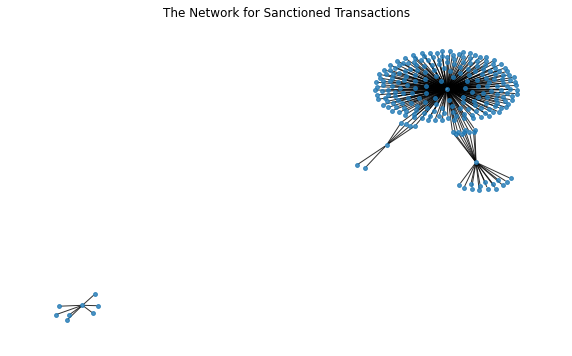

In [64]:
# Make the graph
%matplotlib inline
plt.subplots(figsize=(10, 6))
nx.draw(G, with_labels=False, node_size=15, alpha=0.8, arrows=True)
plt.title("The Network for Sanctioned Transactions")
plt.savefig('sanctioned.png', dpi=1000)
plt.show()

In [65]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [66]:
G_before =nx.from_pandas_edgelist(merge_sanctioned_before, 'from_address', 'to_address', create_using=nx.Graph() )

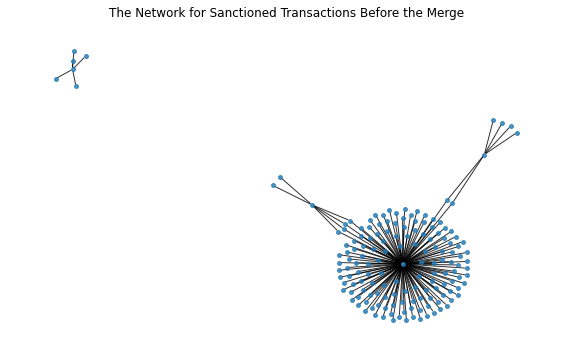

In [67]:
# Make the graph
%matplotlib inline
plt.subplots(figsize=(10, 6))
nx.draw(G_before, with_labels=False, node_size=15, alpha=0.8, arrows=True)
plt.title("The Network for Sanctioned Transactions Before the Merge")
plt.savefig('sanctioned_before.png', dpi=1000)
plt.show()

In [68]:
leaderboard = {}
for x in G_before.nodes:
 leaderboard[x] = len(G_before[x])
s = pd.Series(leaderboard, name='connections')
merge_sanctioned_network_before = s.to_frame().sort_values('connections', ascending=False)
merge_sanctioned_network_before

,connections
0xd90e2f925da726b50c4ed8d0fb90ad053324f31b,143
0xca0840578f57fe71599d29375e16783424023357,6
0x58e8dcc13be9780fc42e8723d8ead4cf46943df2,6
0x3ad9db589d201a710ed237c829c7860ba86510fc,5
0xd52b5257f8038be945d613ef7b03c2c2ef1f7312,2
0x9ee26a4bfd731e8e742b65bf955814eaddd7f151,2
0x7e3893725d4e238b4c8c83375bbad024a66ffa42,2
0x5548be19a291a1dd02c01b1af2ba15a951cfd33d,2
0xcbd78860218160f4b463612f30806807fe6e804c,2
0x3665b1e938ce90c48502303acb5049fb065d3a85,2


In [69]:
merge_sanctioned_network_before['address']=merge_sanctioned_network_before.index
merge_sanctioned_network_before 

,connections,address
0xd90e2f925da726b50c4ed8d0fb90ad053324f31b,143,0xd90e2f925da726b50c4ed8d0fb90ad053324f31b
0xca0840578f57fe71599d29375e16783424023357,6,0xca0840578f57fe71599d29375e16783424023357
0x58e8dcc13be9780fc42e8723d8ead4cf46943df2,6,0x58e8dcc13be9780fc42e8723d8ead4cf46943df2
0x3ad9db589d201a710ed237c829c7860ba86510fc,5,0x3ad9db589d201a710ed237c829c7860ba86510fc
0xd52b5257f8038be945d613ef7b03c2c2ef1f7312,2,0xd52b5257f8038be945d613ef7b03c2c2ef1f7312
0x9ee26a4bfd731e8e742b65bf955814eaddd7f151,2,0x9ee26a4bfd731e8e742b65bf955814eaddd7f151
0x7e3893725d4e238b4c8c83375bbad024a66ffa42,2,0x7e3893725d4e238b4c8c83375bbad024a66ffa42
0x5548be19a291a1dd02c01b1af2ba15a951cfd33d,2,0x5548be19a291a1dd02c01b1af2ba15a951cfd33d
0xcbd78860218160f4b463612f30806807fe6e804c,2,0xcbd78860218160f4b463612f30806807fe6e804c
0x3665b1e938ce90c48502303acb5049fb065d3a85,2,0x3665b1e938ce90c48502303acb5049fb065d3a85


In [70]:
merge_sanctioned_network_before=merge_sanctioned_network_before.merge(merge_sanctioned_before, how="inner", left_on="address",right_on="OFAC sanctioned address interacted")
merge_sanctioned_network_before

,connections,address,hash,block_number,from_address,to_address,OFAC sanctioned address interacted,sanctioned_type,merge,delay,included_in_block_num
0,143,0xd90e2f925da726b50c4ed8d0fb90ad053324f31b,0x2c59f0a73c8bfaf289baea1a1194adf2734745fd384d...,15467394,0x167b6cbf3bb4dd2f234a756717f822ecb12604bf,0xd90e2f925da726b50c4ed8d0fb90ad053324f31b,0xd90e2f925da726b50c4ed8d0fb90ad053324f31b,to_address,0,271.716870,15467394.0
1,143,0xd90e2f925da726b50c4ed8d0fb90ad053324f31b,0x317d423adb49eac61e9ecf240b69a25053a788b54c4c...,15467394,0x167b6cbf3bb4dd2f234a756717f822ecb12604bf,0xd90e2f925da726b50c4ed8d0fb90ad053324f31b,0xd90e2f925da726b50c4ed8d0fb90ad053324f31b,to_address,0,223.774780,15467394.0
2,143,0xd90e2f925da726b50c4ed8d0fb90ad053324f31b,0x0db37618f82511a17ef882de6e6259786cc1beee37cb...,15467400,0x167b6cbf3bb4dd2f234a756717f822ecb12604bf,0xd90e2f925da726b50c4ed8d0fb90ad053324f31b,0xd90e2f925da726b50c4ed8d0fb90ad053324f31b,to_address,0,6.175921,15467400.0
3,143,0xd90e2f925da726b50c4ed8d0fb90ad053324f31b,0x5c26b94303737faae67d26bb54e3360e6eea1a203b39...,15467405,0x167b6cbf3bb4dd2f234a756717f822ecb12604bf,0xd90e2f925da726b50c4ed8d0fb90ad053324f31b,0xd90e2f925da726b50c4ed8d0fb90ad053324f31b,to_address,0,32.460808,15467405.0
4,143,0xd90e2f925da726b50c4ed8d0fb90ad053324f31b,0x72e99b8cee87eecbd7ea84fc406e25df866619503eff...,15467406,0x167b6cbf3bb4dd2f234a756717f822ecb12604bf,0xd90e2f925da726b50c4ed8d0fb90ad053324f31b,0xd90e2f925da726b50c4ed8d0fb90ad053324f31b,to_address,0,20.378905,15467406.0
...,...,...,...,...,...,...,...,...,...,...,...
1114,5,0x3ad9db589d201a710ed237c829c7860ba86510fc,0x396278661d162ba33f5fdb27663b4d57bb02f15d99e0...,15489645,0xf9cfec3016b37ec4ab7002c2a9df1018ab720302,0x3ad9db589d201a710ed237c829c7860ba86510fc,0x3ad9db589d201a710ed237c829c7860ba86510fc,to_address,0,26.702534,15489645.0
1115,5,0x3ad9db589d201a710ed237c829c7860ba86510fc,0xbf6005608239981c1f3cbf36a52abe6c35e94c6b94ba...,15489724,0x9696f59e4d72e237be84ffd425dcad154bf96976,0x3ad9db589d201a710ed237c829c7860ba86510fc,0x3ad9db589d201a710ed237c829c7860ba86510fc,to_address,0,5.707112,15489724.0
1116,5,0x3ad9db589d201a710ed237c829c7860ba86510fc,0x21ce9c2ce32c93c5f55e55c7ac2959b45a3f911fe8b5...,15490711,0xb25bdee2fd79b517db1b6fcb2c220fee5901fa83,0x3ad9db589d201a710ed237c829c7860ba86510fc,0x3ad9db589d201a710ed237c829c7860ba86510fc,to_address,0,-8.532744,15490711.0
1117,5,0x3ad9db589d201a710ed237c829c7860ba86510fc,0xaebeeb27f7250db127166d0e92f88e76bfa18f1ae0be...,15516529,0xdfd5293d8e347dfe59e90efd55b2956a1343963d,0x3ad9db589d201a710ed237c829c7860ba86510fc,0x3ad9db589d201a710ed237c829c7860ba86510fc,to_address,0,48.901592,15516529.0


In [ ]:
merge_sanctioned_network_before["hash","OFAC sanctioned address interacted",].to_markdown(index=False)

In [71]:
merge_sanctioned_network_before.loc[merge_sanctioned_network_before.delay.isna()]

,connections,address,hash,block_number,from_address,to_address,OFAC sanctioned address interacted,sanctioned_type,merge,delay,included_in_block_num


In [72]:
G_after =nx.from_pandas_edgelist(merge_sanctioned_after, 'from_address', 'to_address', create_using=nx.Graph() )

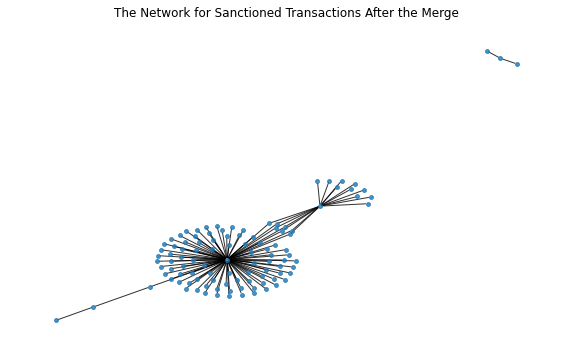

In [73]:
# Make the graph
%matplotlib inline
plt.subplots(figsize=(10, 6))
nx.draw(G_after, with_labels=False, node_size=15, alpha=0.8, arrows=True)
plt.title("The Network for Sanctioned Transactions After the Merge")
plt.savefig('sanctioned_after.png', dpi=1000)
plt.show()

In [74]:
leaderboard = {}
for x in G_after.nodes:
 leaderboard[x] = len(G_after[x])
s = pd.Series(leaderboard, name='connections')
merge_sanctioned_network_after = s.to_frame().sort_values('connections', ascending=False)
merge_sanctioned_network_after

,connections
0xd90e2f925da726b50c4ed8d0fb90ad053324f31b,91
0xca0840578f57fe71599d29375e16783424023357,17
0x3ad9db589d201a710ed237c829c7860ba86510fc,2
0x151085fd439c2bed40f8b92cd5da37c9c3392c16,2
0x470f65fe48d5e63330558d675524ac76b513e308,2
0x762530df1fa51d34af1e573836677976cb6f165a,2
0x9c72f3116a7a2b4105c8ea50aacfbc8a86e269f1,2
0xdf8e8e77af39cc9d97a6b31d96ea883527b1eac5,2
0xc49eaa7318cb8f6169b011c82659c81694eef0ca,2
0x58e8dcc13be9780fc42e8723d8ead4cf46943df2,2


In [75]:
merge_sanctioned_network_after['address']=merge_sanctioned_network_after.index
merge_sanctioned_network_after

,connections,address
0xd90e2f925da726b50c4ed8d0fb90ad053324f31b,91,0xd90e2f925da726b50c4ed8d0fb90ad053324f31b
0xca0840578f57fe71599d29375e16783424023357,17,0xca0840578f57fe71599d29375e16783424023357
0x3ad9db589d201a710ed237c829c7860ba86510fc,2,0x3ad9db589d201a710ed237c829c7860ba86510fc
0x151085fd439c2bed40f8b92cd5da37c9c3392c16,2,0x151085fd439c2bed40f8b92cd5da37c9c3392c16
0x470f65fe48d5e63330558d675524ac76b513e308,2,0x470f65fe48d5e63330558d675524ac76b513e308
0x762530df1fa51d34af1e573836677976cb6f165a,2,0x762530df1fa51d34af1e573836677976cb6f165a
0x9c72f3116a7a2b4105c8ea50aacfbc8a86e269f1,2,0x9c72f3116a7a2b4105c8ea50aacfbc8a86e269f1
0xdf8e8e77af39cc9d97a6b31d96ea883527b1eac5,2,0xdf8e8e77af39cc9d97a6b31d96ea883527b1eac5
0xc49eaa7318cb8f6169b011c82659c81694eef0ca,2,0xc49eaa7318cb8f6169b011c82659c81694eef0ca
0x58e8dcc13be9780fc42e8723d8ead4cf46943df2,2,0x58e8dcc13be9780fc42e8723d8ead4cf46943df2


In [76]:
merge_sanctioned_network_after=merge_sanctioned_network_after.merge(merge_sanctioned_after, how="inner", left_on="address",right_on="OFAC sanctioned address interacted")
merge_sanctioned_network_after

,connections,address,hash,block_number,from_address,to_address,OFAC sanctioned address interacted,sanctioned_type,merge,delay,included_in_block_num
0,91,0xd90e2f925da726b50c4ed8d0fb90ad053324f31b,0x0297251518ae01c33c345c9eae3aa8f31f57c554d475...,15537909,0x6a2d058890cca15beaee5050caaad56b2ab54dd4,0xd90e2f925da726b50c4ed8d0fb90ad053324f31b,0xd90e2f925da726b50c4ed8d0fb90ad053324f31b,to_address,1,34.578109,15537909.0
1,91,0xd90e2f925da726b50c4ed8d0fb90ad053324f31b,0x7fbfe641cb7ba2bc526cd09af0fe75ff5fce4abf40a9...,15537957,0x0f69bea3e0aa0f40d5bce1875565ff87ab058db0,0xd90e2f925da726b50c4ed8d0fb90ad053324f31b,0xd90e2f925da726b50c4ed8d0fb90ad053324f31b,to_address,1,7.701093,15537957.0
2,91,0xd90e2f925da726b50c4ed8d0fb90ad053324f31b,0xdc89fbd164a622f0d7e282e58a02cff79e4ce09f2c06...,15537971,0x12d92fed171f16b3a05acb1542b40648e7ced384,0xd90e2f925da726b50c4ed8d0fb90ad053324f31b,0xd90e2f925da726b50c4ed8d0fb90ad053324f31b,to_address,1,238.203087,15537971.0
3,91,0xd90e2f925da726b50c4ed8d0fb90ad053324f31b,0xccc5ce5a69c84e8de02f8fbef06540605cafa91a966d...,15538486,0x5021410f5450e8d66c274688be25f1bd73dc55e4,0xd90e2f925da726b50c4ed8d0fb90ad053324f31b,0xd90e2f925da726b50c4ed8d0fb90ad053324f31b,to_address,1,23.902774,15538486.0
4,91,0xd90e2f925da726b50c4ed8d0fb90ad053324f31b,0x0d9e82be92351934584bd9f3a214463ec33cabe721b3...,15539142,0x3a1d526d09b7e59fd88de4726f68a8246ddc2742,0xd90e2f925da726b50c4ed8d0fb90ad053324f31b,0xd90e2f925da726b50c4ed8d0fb90ad053324f31b,to_address,1,13.816760,15539142.0
...,...,...,...,...,...,...,...,...,...,...,...
500,2,0x3ad9db589d201a710ed237c829c7860ba86510fc,0xccb44ff691102ed30bf023cd6ee507f75feae2285c8e...,15559539,0x3ad9db589d201a710ed237c829c7860ba86510fc,0x4d981f56e1084c2661edf0e678863d8ada4fdf7c,0x3ad9db589d201a710ed237c829c7860ba86510fc,from_address,1,16.629810,15559539.0
501,2,0x3ad9db589d201a710ed237c829c7860ba86510fc,0xdef1a59eb486ffecf279774940eeb4131f57716bfd11...,15584119,0x3ad9db589d201a710ed237c829c7860ba86510fc,0x7ca7e53817cca98d997a7d70ac54c4e8fb66d24a,0x3ad9db589d201a710ed237c829c7860ba86510fc,from_address,1,6.950498,15584119.0
502,2,0x58e8dcc13be9780fc42e8723d8ead4cf46943df2,0x0984c2c2dc6fc6c58bd547eeaf516aa305bcfef8c7a8...,15560721,0x9ee26a4bfd731e8e742b65bf955814eaddd7f151,0x58e8dcc13be9780fc42e8723d8ead4cf46943df2,0x58e8dcc13be9780fc42e8723d8ead4cf46943df2,to_address,1,13.458797,15560721.0
503,2,0x58e8dcc13be9780fc42e8723d8ead4cf46943df2,0x6eace8a0b624735a324f40b42915c1b5ed6d5933f024...,15563695,0xcbd78860218160f4b463612f30806807fe6e804c,0x58e8dcc13be9780fc42e8723d8ead4cf46943df2,0x58e8dcc13be9780fc42e8723d8ead4cf46943df2,to_address,1,17.693171,15563695.0


In [82]:
pd.set_option('max_colwidth', 60)
unobserved_sanctioned=merge_sanctioned_network_after.loc[merge_sanctioned_network_after.delay.isna()]
unobserved_sanctioned

,connections,address,hash,block_number,from_address,to_address,OFAC sanctioned address interacted,sanctioned_type,merge,delay,included_in_block_num
23,91,0xd90e2f925da726b50c4ed8d0fb90ad053324f31b,0x0fb9a4e23d7c504571daed1394feea8bcb823a18a2887e7cab54f7...,15547530,0x3a1d526d09b7e59fd88de4726f68a8246ddc2742,0xd90e2f925da726b50c4ed8d0fb90ad053324f31b,0xd90e2f925da726b50c4ed8d0fb90ad053324f31b,to_address,1,NaN,NaN
25,91,0xd90e2f925da726b50c4ed8d0fb90ad053324f31b,0xb37f8b00993271dd97ac9acdb4d84cb31cd210a037286bcc4bc788...,15547615,0x62e142f218585827436f59997c301f7040396ad4,0xd90e2f925da726b50c4ed8d0fb90ad053324f31b,0xd90e2f925da726b50c4ed8d0fb90ad053324f31b,to_address,1,NaN,NaN
26,91,0xd90e2f925da726b50c4ed8d0fb90ad053324f31b,0xd5c80d358016a1fe77260fa9cab88a706337c6f41f9112eca8840e...,15547687,0x7b60143db493df877400bc9682749545f6de705a,0xd90e2f925da726b50c4ed8d0fb90ad053324f31b,0xd90e2f925da726b50c4ed8d0fb90ad053324f31b,to_address,1,NaN,NaN
27,91,0xd90e2f925da726b50c4ed8d0fb90ad053324f31b,0x52cd1910b0710e73a9fb85f9e13861ef828a3244a1fa03944e47ad...,15547688,0x19a504b1096ae59624105e737b22f5943b1a4846,0xd90e2f925da726b50c4ed8d0fb90ad053324f31b,0xd90e2f925da726b50c4ed8d0fb90ad053324f31b,to_address,1,NaN,NaN
31,91,0xd90e2f925da726b50c4ed8d0fb90ad053324f31b,0xe4a84c77748a627a093f79c6abb4b037c60ae9f58977bab2c46d17...,15547677,0x19a504b1096ae59624105e737b22f5943b1a4846,0xd90e2f925da726b50c4ed8d0fb90ad053324f31b,0xd90e2f925da726b50c4ed8d0fb90ad053324f31b,to_address,1,NaN,NaN
34,91,0xd90e2f925da726b50c4ed8d0fb90ad053324f31b,0x094cd7a9dc72cf6b3415fd18223a075e631d4ee5bfc900b9293dbd...,15547683,0x19a504b1096ae59624105e737b22f5943b1a4846,0xd90e2f925da726b50c4ed8d0fb90ad053324f31b,0xd90e2f925da726b50c4ed8d0fb90ad053324f31b,to_address,1,NaN,NaN
119,91,0xd90e2f925da726b50c4ed8d0fb90ad053324f31b,0x78c426d5b25290aa03153c728383f2d422c7a14a40a0a5e11bea67...,15561997,0xefc225d6344d5bbb3dc9c0c3cee49b1564d25661,0xd90e2f925da726b50c4ed8d0fb90ad053324f31b,0xd90e2f925da726b50c4ed8d0fb90ad053324f31b,to_address,1,NaN,NaN
120,91,0xd90e2f925da726b50c4ed8d0fb90ad053324f31b,0x9d4fcf6315d8fbf2e07dc71a2c81df8c86a2dd518ac76c48eaeb39...,15562324,0xefc225d6344d5bbb3dc9c0c3cee49b1564d25661,0xd90e2f925da726b50c4ed8d0fb90ad053324f31b,0xd90e2f925da726b50c4ed8d0fb90ad053324f31b,to_address,1,NaN,NaN
206,91,0xd90e2f925da726b50c4ed8d0fb90ad053324f31b,0x0b9613f988da92901816bc76af743974032985b5eeeab70d5940c6...,15575518,0x00315dc3d1f4968b6b78e109579209c93e85f934,0xd90e2f925da726b50c4ed8d0fb90ad053324f31b,0xd90e2f925da726b50c4ed8d0fb90ad053324f31b,to_address,1,NaN,NaN


In [84]:
print(unobserved_sanctioned[["address","hash"]].to_markdown(index=False))

| address                                    | hash                                                               |
|:-------------------------------------------|:-------------------------------------------------------------------|
| 0xd90e2f925da726b50c4ed8d0fb90ad053324f31b | 0x0fb9a4e23d7c504571daed1394feea8bcb823a18a2887e7cab54f7fa4ffa2981 |
| 0xd90e2f925da726b50c4ed8d0fb90ad053324f31b | 0xb37f8b00993271dd97ac9acdb4d84cb31cd210a037286bcc4bc7887f0008a81f |
| 0xd90e2f925da726b50c4ed8d0fb90ad053324f31b | 0xd5c80d358016a1fe77260fa9cab88a706337c6f41f9112eca8840e9233794e82 |
| 0xd90e2f925da726b50c4ed8d0fb90ad053324f31b | 0x52cd1910b0710e73a9fb85f9e13861ef828a3244a1fa03944e47adf38ac9f851 |
| 0xd90e2f925da726b50c4ed8d0fb90ad053324f31b | 0xe4a84c77748a627a093f79c6abb4b037c60ae9f58977bab2c46d17a657f2afcd |
| 0xd90e2f925da726b50c4ed8d0fb90ad053324f31b | 0x094cd7a9dc72cf6b3415fd18223a075e631d4ee5bfc900b9293dbd135db24334 |
| 0xd90e2f925da726b50c4ed8d0fb90ad053324f31b | 0x78c426d5b25290aa03153c7

In [ ]:
merge_sanctioned.loc[merge_sanctioned["OFAC sanctioned address interacted"]=="0xd90e2f925da726b50c4ed8d0fb90ad053324f31b"]

,hash,block_number,from_address,to_address,OFAC sanctioned address interacted,sanctioned_type,merge,delay,included_in_block_num
2,0x2c59f0a73c8bfaf289baea1a1194adf2734745fd384d...,15467394,0x167b6cbf3bb4dd2f234a756717f822ecb12604bf,0xd90e2f925da726b50c4ed8d0fb90ad053324f31b,0xd90e2f925da726b50c4ed8d0fb90ad053324f31b,to_address,0,271.716870,15467394.0
3,0x317d423adb49eac61e9ecf240b69a25053a788b54c4c...,15467394,0x167b6cbf3bb4dd2f234a756717f822ecb12604bf,0xd90e2f925da726b50c4ed8d0fb90ad053324f31b,0xd90e2f925da726b50c4ed8d0fb90ad053324f31b,to_address,0,223.774780,15467394.0
4,0x0db37618f82511a17ef882de6e6259786cc1beee37cb...,15467400,0x167b6cbf3bb4dd2f234a756717f822ecb12604bf,0xd90e2f925da726b50c4ed8d0fb90ad053324f31b,0xd90e2f925da726b50c4ed8d0fb90ad053324f31b,to_address,0,6.175921,15467400.0
5,0x5c26b94303737faae67d26bb54e3360e6eea1a203b39...,15467405,0x167b6cbf3bb4dd2f234a756717f822ecb12604bf,0xd90e2f925da726b50c4ed8d0fb90ad053324f31b,0xd90e2f925da726b50c4ed8d0fb90ad053324f31b,to_address,0,32.460808,15467405.0
6,0x72e99b8cee87eecbd7ea84fc406e25df866619503eff...,15467406,0x167b6cbf3bb4dd2f234a756717f822ecb12604bf,0xd90e2f925da726b50c4ed8d0fb90ad053324f31b,0xd90e2f925da726b50c4ed8d0fb90ad053324f31b,to_address,0,20.378905,15467406.0
...,...,...,...,...,...,...,...,...,...
1619,0xab46da07475ecaa3328bebf6afd32c9d5b5ed8049c82...,15604819,0x6a2d058890cca15beaee5050caaad56b2ab54dd4,0xd90e2f925da726b50c4ed8d0fb90ad053324f31b,0xd90e2f925da726b50c4ed8d0fb90ad053324f31b,to_address,1,13.078521,15604819.0
1620,0x0b37079b2261ea9b0b7e5a262e621aed6b24c690f327...,15604803,0xc11b8b749d433a76570677743cf9bc8cf79729ee,0xd90e2f925da726b50c4ed8d0fb90ad053324f31b,0xd90e2f925da726b50c4ed8d0fb90ad053324f31b,to_address,1,33.269205,15604803.0
1621,0x0713cf592182da234a59d4cdaf08a782e4dc6e266aad...,15604837,0x6a2d058890cca15beaee5050caaad56b2ab54dd4,0xd90e2f925da726b50c4ed8d0fb90ad053324f31b,0xd90e2f925da726b50c4ed8d0fb90ad053324f31b,to_address,1,30.136468,15604837.0
1622,0x7945b217415bb7f4ff87f574fdbe74faf5f719edb04b...,15604906,0x45e0877ffe846cec3982a16435f633c1aaba290e,0xd90e2f925da726b50c4ed8d0fb90ad053324f31b,0xd90e2f925da726b50c4ed8d0fb90ad053324f31b,to_address,1,18.560883,15604906.0


In [ ]:
merge_sanctioned_network_before.groupby("connections")["delay"].describe()

,count,mean,std,min,25%,50%,75%,max
connections,,,,,,,,
5,5.0,5478.913750,12210.558475,-8.532744,5.707112,26.702534,48.901592,2.732179e+04
6,20.0,206.504729,741.521494,3.193505,12.375664,23.262960,44.555556,3.349825e+03
143,1094.0,5673.466878,126141.246025,-3.738939,9.776433,19.683892,38.187889,2.950860e+06


In [ ]:
merge_sanctioned_network_after.groupby("connections")["delay"].describe()

,count,mean,std,min,25%,50%,75%,max
connections,,,,,,,,
2,5.0,14.277110,4.393168,6.950498,13.458797,16.629810,16.653275,17.693171
17,22.0,15.912265,11.640860,-4.061979,10.451596,14.177604,18.714571,55.744038
91,469.0,47.326577,256.565088,2.611859,11.900719,17.250437,23.041812,3107.158415


In [ ]:
merge_sanctioned_dropna = pd.read_csv("merge_sanctioned_dropna.csv",index_col="Unnamed: 0")
merge_sanctioned_dropna

,hash,block_number,from_address,to_address,OFAC sanctioned address interacted,sanctioned_type,merge,delay,included_in_block_num
0,0xccb44ff691102ed30bf023cd6ee507f75feae2285c8e...,15559539,0x3ad9db589d201a710ed237c829c7860ba86510fc,0x4d981f56e1084c2661edf0e678863d8ada4fdf7c,0x3ad9db589d201a710ed237c829c7860ba86510fc,from_address,1,16.629810,15559539.0
1,0xdef1a59eb486ffecf279774940eeb4131f57716bfd11...,15584119,0x3ad9db589d201a710ed237c829c7860ba86510fc,0x7ca7e53817cca98d997a7d70ac54c4e8fb66d24a,0x3ad9db589d201a710ed237c829c7860ba86510fc,from_address,1,6.950498,15584119.0
2,0x2c59f0a73c8bfaf289baea1a1194adf2734745fd384d...,15467394,0x167b6cbf3bb4dd2f234a756717f822ecb12604bf,0xd90e2f925da726b50c4ed8d0fb90ad053324f31b,0xd90e2f925da726b50c4ed8d0fb90ad053324f31b,to_address,0,271.716870,15467394.0
3,0x317d423adb49eac61e9ecf240b69a25053a788b54c4c...,15467394,0x167b6cbf3bb4dd2f234a756717f822ecb12604bf,0xd90e2f925da726b50c4ed8d0fb90ad053324f31b,0xd90e2f925da726b50c4ed8d0fb90ad053324f31b,to_address,0,223.774780,15467394.0
4,0x0db37618f82511a17ef882de6e6259786cc1beee37cb...,15467400,0x167b6cbf3bb4dd2f234a756717f822ecb12604bf,0xd90e2f925da726b50c4ed8d0fb90ad053324f31b,0xd90e2f925da726b50c4ed8d0fb90ad053324f31b,to_address,0,6.175921,15467400.0
...,...,...,...,...,...,...,...,...,...
1619,0xab46da07475ecaa3328bebf6afd32c9d5b5ed8049c82...,15604819,0x6a2d058890cca15beaee5050caaad56b2ab54dd4,0xd90e2f925da726b50c4ed8d0fb90ad053324f31b,0xd90e2f925da726b50c4ed8d0fb90ad053324f31b,to_address,1,13.078521,15604819.0
1620,0x0b37079b2261ea9b0b7e5a262e621aed6b24c690f327...,15604803,0xc11b8b749d433a76570677743cf9bc8cf79729ee,0xd90e2f925da726b50c4ed8d0fb90ad053324f31b,0xd90e2f925da726b50c4ed8d0fb90ad053324f31b,to_address,1,33.269205,15604803.0
1621,0x0713cf592182da234a59d4cdaf08a782e4dc6e266aad...,15604837,0x6a2d058890cca15beaee5050caaad56b2ab54dd4,0xd90e2f925da726b50c4ed8d0fb90ad053324f31b,0xd90e2f925da726b50c4ed8d0fb90ad053324f31b,to_address,1,30.136468,15604837.0
1622,0x7945b217415bb7f4ff87f574fdbe74faf5f719edb04b...,15604906,0x45e0877ffe846cec3982a16435f633c1aaba290e,0xd90e2f925da726b50c4ed8d0fb90ad053324f31b,0xd90e2f925da726b50c4ed8d0fb90ad053324f31b,to_address,1,18.560883,15604906.0


In [ ]:
merge_sanctioned_positive = merge_sanctioned_dropna.loc[merge_sanctioned_dropna.delay>=0]
merge_sanctioned_positive

,hash,block_number,from_address,to_address,OFAC sanctioned address interacted,sanctioned_type,merge,delay,included_in_block_num
0,0xccb44ff691102ed30bf023cd6ee507f75feae2285c8e...,15559539,0x3ad9db589d201a710ed237c829c7860ba86510fc,0x4d981f56e1084c2661edf0e678863d8ada4fdf7c,0x3ad9db589d201a710ed237c829c7860ba86510fc,from_address,1,16.629810,15559539.0
1,0xdef1a59eb486ffecf279774940eeb4131f57716bfd11...,15584119,0x3ad9db589d201a710ed237c829c7860ba86510fc,0x7ca7e53817cca98d997a7d70ac54c4e8fb66d24a,0x3ad9db589d201a710ed237c829c7860ba86510fc,from_address,1,6.950498,15584119.0
2,0x2c59f0a73c8bfaf289baea1a1194adf2734745fd384d...,15467394,0x167b6cbf3bb4dd2f234a756717f822ecb12604bf,0xd90e2f925da726b50c4ed8d0fb90ad053324f31b,0xd90e2f925da726b50c4ed8d0fb90ad053324f31b,to_address,0,271.716870,15467394.0
3,0x317d423adb49eac61e9ecf240b69a25053a788b54c4c...,15467394,0x167b6cbf3bb4dd2f234a756717f822ecb12604bf,0xd90e2f925da726b50c4ed8d0fb90ad053324f31b,0xd90e2f925da726b50c4ed8d0fb90ad053324f31b,to_address,0,223.774780,15467394.0
4,0x0db37618f82511a17ef882de6e6259786cc1beee37cb...,15467400,0x167b6cbf3bb4dd2f234a756717f822ecb12604bf,0xd90e2f925da726b50c4ed8d0fb90ad053324f31b,0xd90e2f925da726b50c4ed8d0fb90ad053324f31b,to_address,0,6.175921,15467400.0
...,...,...,...,...,...,...,...,...,...
1619,0xab46da07475ecaa3328bebf6afd32c9d5b5ed8049c82...,15604819,0x6a2d058890cca15beaee5050caaad56b2ab54dd4,0xd90e2f925da726b50c4ed8d0fb90ad053324f31b,0xd90e2f925da726b50c4ed8d0fb90ad053324f31b,to_address,1,13.078521,15604819.0
1620,0x0b37079b2261ea9b0b7e5a262e621aed6b24c690f327...,15604803,0xc11b8b749d433a76570677743cf9bc8cf79729ee,0xd90e2f925da726b50c4ed8d0fb90ad053324f31b,0xd90e2f925da726b50c4ed8d0fb90ad053324f31b,to_address,1,33.269205,15604803.0
1621,0x0713cf592182da234a59d4cdaf08a782e4dc6e266aad...,15604837,0x6a2d058890cca15beaee5050caaad56b2ab54dd4,0xd90e2f925da726b50c4ed8d0fb90ad053324f31b,0xd90e2f925da726b50c4ed8d0fb90ad053324f31b,to_address,1,30.136468,15604837.0
1622,0x7945b217415bb7f4ff87f574fdbe74faf5f719edb04b...,15604906,0x45e0877ffe846cec3982a16435f633c1aaba290e,0xd90e2f925da726b50c4ed8d0fb90ad053324f31b,0xd90e2f925da726b50c4ed8d0fb90ad053324f31b,to_address,1,18.560883,15604906.0


In [ ]:
merge_sanctioned_positive.groupby("merge")["delay"].describe()

,count,mean,std,min,25%,50%,75%,max
merge,,,,,,,,
0,1113.0,5604.957770,125062.575129,0.115805,10.067270,20.075332,38.705010,2.950860e+06
1,495.0,45.700368,249.828066,1.036414,11.869264,17.156275,22.737678,3.107158e+03


In [ ]:
wt_merge =pd.read_pickle('wt_merge.pkl') 
wt_merge  

,delay,included_in_block_num,hash
Unnamed: 0,,,
0,27.836907,15537264,0xca26b540bdf9758048a7b6f1b87f68d026aacc1d3728...
1,15.129070,15537264,0xca83879857f7a842acfa6f0bdc34102e96fac421da60...
2,26.507015,15537264,0xcb06753b5612e7969871d099901acce56d2229e79a50...
3,15.153113,15537264,0xcbcb6a1fcd784b9506a42704be99c39867aedb4be4be...
4,31.125514,15537264,0xcd9cfa9f0c657d28c7104f2ef79a182e9c27900e9216...
...,...,...,...
23006690,30.315089,15537264,0xc6139913227c89c0bbf51097343938c1d567d25a664f...
23006691,30.202935,15537264,0xc7ab2c873673036e5566606ea0989075234c7319d72b...
23006692,18.360427,15537264,0xc7cfd5a141aeafba15fcbed0e5d7ab1a3e3338db8c0c...


# Part IV: Label the Sanctioned Address

In [30]:
transaction_merge_wt

,hash,nonce,block_hash,block_number,transaction_index,from_address,to_address,value,gas,gas_price,input,block_timestamp,max_fee_per_gas,max_priority_fee_per_gas,transaction_type,delay,included_in_block_num,merge,na
0,0x40f1e852976292130317eb7fdd5ca20ce9f1471d0903...,44918191,0x5c69aec2e3dafde0931b5532345bcfaaf19c18b5d635...,15467393,0,0xea674fdde714fd979de3edf0f56aa9716b898ec8,0xd591cac9a057fe68ebcfbbcbfeb54fa43d8852ae,7949746908430439,250000,16206420881,0x,1662235839,3.086903e+10,1.000000e+09,2,3.112554,15467393.0,0,0
1,0xa02c8132fe4f7a7d6e4c4ecd1e10628b12897751f8df...,44918192,0x5c69aec2e3dafde0931b5532345bcfaaf19c18b5d635...,15467393,1,0xea674fdde714fd979de3edf0f56aa9716b898ec8,0x056ce5403eb0968c7c9a53c644381f179fc1bb60,98332563625038289,250000,16206420881,0x,1662235839,3.086903e+10,1.000000e+09,2,3.094761,15467393.0,0,0
2,0x8cc5c32c2077a37080d9a353ab41e0e140bb1f0e5309...,44918193,0x5c69aec2e3dafde0931b5532345bcfaaf19c18b5d635...,15467393,2,0xea674fdde714fd979de3edf0f56aa9716b898ec8,0x32c89df4793def4287db53c98aa244c3444d0b6d,52501523419871232,250000,16206420881,0x,1662235839,3.086903e+10,1.000000e+09,2,3.077301,15467393.0,0,0
3,0x478c574a8381755334faeba48a021ae1a37c6541833d...,19904,0x5c69aec2e3dafde0931b5532345bcfaaf19c18b5d635...,15467393,3,0x1b2827c3a09993366b8a328685614f03ebebceec,0x5b52bfb8062ce664d74bbcd4cd6dc7df53fd7233,0,90000,32450000001,0xa9059cbb0000000000000000000000001860aefd0482...,1662235839,NaN,NaN,0,3.123005,15467393.0,0,0
4,0x32a92b4de0ca11c444c5f32c8e396d659c540b3fa570...,6790738,0x5c69aec2e3dafde0931b5532345bcfaaf19c18b5d635...,15467393,4,0x46340b20830761efd32832a74d7169b29feb9758,0xdac17f958d2ee523a2206206994597c13d831ec7,0,350000,30606380534,0xa9059cbb000000000000000000000000b8b76f7c194a...,1662235839,NaN,NaN,0,-3.777130,15467393.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23871248,0x532a8f7c563ddec2436ea64856cd6ad40a10310107c1...,107,0x09db39db1158731d06ae7c7de467f96dec2e33caa390...,15607384,153,0x60748a45b5e6b2b06d305eaad5a216e9f0215e57,0xd588b586d61c826a0e87919b3d1a239206d58bf2,0,88534,5168123486,0x75090ebf000000000000000000000000000000000000...,1664072723,8.410607e+09,1.000000e+09,2,4.309812,15607384.0,1,0
23871249,0x40339a748011b4f3f8e6586cf26d9f1a1d885e87f235...,12,0x09db39db1158731d06ae7c7de467f96dec2e33caa390...,15607384,154,0x06c94d39044238562073ca45d523557deb03af0a,0x484b2d4e3f4412830de1e28d0092762b3663b181,1000000000000000,164631,5168123486,0xa0712d68000000000000000000000000000000000000...,1664072723,8.361646e+09,1.000000e+09,2,3.778053,15607384.0,1,0
23871250,0x5c6cc7d75e9898a70878bbdd63f75db081062dbc2b26...,14,0x09db39db1158731d06ae7c7de467f96dec2e33caa390...,15607384,155,0x78c6f856f83c9bbd0e774bc52269e2a5adf0d81b,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,0,58550,5060000000,0xa9059cbb000000000000000000000000c6115b980ce4...,1664072723,NaN,NaN,0,6.781098,15607384.0,1,0
23871251,0xe4ac4926bead6983292077814c9fca540f482fe8efd6...,0,0x09db39db1158731d06ae7c7de467f96dec2e33caa390...,15607384,156,0x50e886130e3987f60b390b0527b978ff708bcfef,0x20f780a973856b93f63670377900c1d2a50a77c4,2000000000000,124730,5000000000,0x5f57685e000000000000000000000000000000000000...,1664072723,5.000000e+09,2.000000e+09,2,9.649881,15607384.0,1,0


In [32]:
merge_sanctioned= pd.read_csv("merge_sanctioned.csv",index_col="Unnamed: 0")
merge_sanctioned

,hash,block_number,from_address,to_address,OFAC sanctioned address interacted,sanctioned_type,merge,delay,included_in_block_num
0,0xccb44ff691102ed30bf023cd6ee507f75feae2285c8e...,15559539,0x3ad9db589d201a710ed237c829c7860ba86510fc,0x4d981f56e1084c2661edf0e678863d8ada4fdf7c,0x3ad9db589d201a710ed237c829c7860ba86510fc,from_address,1,16.629810,15559539.0
1,0xdef1a59eb486ffecf279774940eeb4131f57716bfd11...,15584119,0x3ad9db589d201a710ed237c829c7860ba86510fc,0x7ca7e53817cca98d997a7d70ac54c4e8fb66d24a,0x3ad9db589d201a710ed237c829c7860ba86510fc,from_address,1,6.950498,15584119.0
2,0x2c59f0a73c8bfaf289baea1a1194adf2734745fd384d...,15467394,0x167b6cbf3bb4dd2f234a756717f822ecb12604bf,0xd90e2f925da726b50c4ed8d0fb90ad053324f31b,0xd90e2f925da726b50c4ed8d0fb90ad053324f31b,to_address,0,271.716870,15467394.0
3,0x317d423adb49eac61e9ecf240b69a25053a788b54c4c...,15467394,0x167b6cbf3bb4dd2f234a756717f822ecb12604bf,0xd90e2f925da726b50c4ed8d0fb90ad053324f31b,0xd90e2f925da726b50c4ed8d0fb90ad053324f31b,to_address,0,223.774780,15467394.0
4,0x0db37618f82511a17ef882de6e6259786cc1beee37cb...,15467400,0x167b6cbf3bb4dd2f234a756717f822ecb12604bf,0xd90e2f925da726b50c4ed8d0fb90ad053324f31b,0xd90e2f925da726b50c4ed8d0fb90ad053324f31b,to_address,0,6.175921,15467400.0
...,...,...,...,...,...,...,...,...,...
1619,0xab46da07475ecaa3328bebf6afd32c9d5b5ed8049c82...,15604819,0x6a2d058890cca15beaee5050caaad56b2ab54dd4,0xd90e2f925da726b50c4ed8d0fb90ad053324f31b,0xd90e2f925da726b50c4ed8d0fb90ad053324f31b,to_address,1,13.078521,15604819.0
1620,0x0b37079b2261ea9b0b7e5a262e621aed6b24c690f327...,15604803,0xc11b8b749d433a76570677743cf9bc8cf79729ee,0xd90e2f925da726b50c4ed8d0fb90ad053324f31b,0xd90e2f925da726b50c4ed8d0fb90ad053324f31b,to_address,1,33.269205,15604803.0
1621,0x0713cf592182da234a59d4cdaf08a782e4dc6e266aad...,15604837,0x6a2d058890cca15beaee5050caaad56b2ab54dd4,0xd90e2f925da726b50c4ed8d0fb90ad053324f31b,0xd90e2f925da726b50c4ed8d0fb90ad053324f31b,to_address,1,30.136468,15604837.0
1622,0x7945b217415bb7f4ff87f574fdbe74faf5f719edb04b...,15604906,0x45e0877ffe846cec3982a16435f633c1aaba290e,0xd90e2f925da726b50c4ed8d0fb90ad053324f31b,0xd90e2f925da726b50c4ed8d0fb90ad053324f31b,to_address,1,18.560883,15604906.0


In [33]:
list=merge_sanctioned["hash"].to_list()
list

['0xccb44ff691102ed30bf023cd6ee507f75feae2285c8e6a80a3af633fe69f9d19',
 '0xdef1a59eb486ffecf279774940eeb4131f57716bfd1130705816b6bf386724aa',
 '0x2c59f0a73c8bfaf289baea1a1194adf2734745fd384dc3556f72458776b627a2',
 '0x317d423adb49eac61e9ecf240b69a25053a788b54c4c0f6ba82c0c144f5a566e',
 '0x0db37618f82511a17ef882de6e6259786cc1beee37cbefde5a54df79d2966303',
 '0x5c26b94303737faae67d26bb54e3360e6eea1a203b39fc01e90e86310857e278',
 '0x72e99b8cee87eecbd7ea84fc406e25df866619503effe1158e52112b60d08559',
 '0x842326ad13676c11e4376688bc9ca50307768b01c5c8a3733ddb22454e09d89f',
 '0xc626ada211628a7cfbd3b6f6e637a1650e56ec9dd9d6b26654cf7753c0815154',
 '0xbdf4fa612e67f9c1c5a7f053f3559f916beceeeb21de4b05b60073a9c14ddf9b',
 '0xdc68eb118d0f19114351afa2557249e5e035dcfd52502027db63e57f0c750b6c',
 '0xdb1d0bdf67e53676a0a461a20c37b5520ff2a5cc9b0eacc2dacbb435a65bd394',
 '0xfe2f3edcfb826c5fa20333d310656b8f4d70fd808531d5868af3ae4c39b96fd5',
 '0xae53dcd5a8d09762871c603b58a99e2318b8336c2fb539bc661a6f762c195991',
 '0xa9

In [35]:
transaction_merge_wt["sanctioned"]=0
transaction_merge_wt.loc[transaction_merge_wt.hash.isin(list),"sanctioned"]=1
transaction_merge_wt

,nonce,block_number,transaction_index,gas,gas_price,block_timestamp,max_fee_per_gas,max_priority_fee_per_gas,transaction_type,delay,included_in_block_num,merge,na,sanctioned
count,2.387125e+07,2.387125e+07,2.387125e+07,2.387125e+07,2.387125e+07,2.387125e+07,1.975415e+07,1.975415e+07,2.387125e+07,2.300670e+07,2.300670e+07,2.387125e+07,2.387125e+07,2.387125e+07
mean,1.202496e+06,1.553586e+07,1.293012e+02,1.788305e+05,1.671313e+10,1.663168e+09,4.735846e+10,5.200865e+09,1.657048e+00,5.069200e+03,1.553549e+07,4.858116e-01,3.621754e-02,6.803162e-05
std,6.040793e+06,3.978297e+04,1.178614e+02,5.404097e+05,1.391224e+11,5.254197e+05,1.986769e+11,1.350009e+11,7.525273e-01,1.512011e+05,3.981485e+04,4.997987e-01,1.868310e-01,8.247848e-03
min,0.000000e+00,1.546739e+07,0.000000e+00,2.100000e+04,1.729740e+09,1.662236e+09,1.865652e+09,0.000000e+00,0.000000e+00,-5.572324e+04,1.546739e+07,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.100000e+01,1.550178e+07,4.600000e+01,2.101400e+04,6.865152e+09,1.662713e+09,9.745639e+09,1.500000e+09,2.000000e+00,8.524546e+00,1.550138e+07,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.580000e+02,1.553554e+07,1.010000e+02,8.837700e+04,1.050063e+10,1.663197e+09,1.600000e+10,1.500000e+09,2.000000e+00,1.437666e+01,1.553488e+07,0.000000e+00,0.000000e+00,0.000000e+00
75%,3.803000e+03,1.556919e+07,1.810000e+02,2.071280e+05,1.706672e+10,1.663610e+09,3.104659e+10,2.000000e+09,2.000000e+00,2.236068e+01,1.556890e+07,1.000000e+00,0.000000e+00,0.000000e+00
max,4.532576e+07,1.560739e+07,1.417000e+03,3.004158e+07,4.200000e+14,1.664073e+09,4.200000e+14,4.199512e+14,2.000000e+00,6.292439e+06,1.560739e+07,1.000000e+00,1.000000e+00,1.000000e+00


In [47]:
group_sanction_merge=transaction_merge_wt.groupby(["sanctioned","merge"]).size().unstack(fill_value=0)
group_sanction_merge

merge,0,1
sanctioned,,
0,9712821,9120233
1,1007,466


In [54]:
print(group_sanction_merge.to_latex(index=True)) 

\begin{tabular}{lrr}
\toprule
merge &        0 &        1 \\
sanctioned &          &          \\
\midrule
0          &  9712821 &  9120233 \\
1          &     1007 &      466 \\
\bottomrule
\end{tabular}



In [88]:
print(group_sanction_merge.to_markdown(index=True)) 

|   sanctioned |              0 |             1 |
|-------------:|---------------:|--------------:|
|            0 |    9.71282e+06 |   9.12023e+06 |
|            1 | 1007           | 466           |


In [49]:
transaction_merge_wt = transaction_merge_wt.dropna()
transaction_merge_wt = transaction_merge_wt.loc[transaction_merge_wt.delay>=0]

In [50]:
delay_sanction_merge=transaction_merge_wt.groupby(["sanctioned","merge"])["delay"].describe()
delay_sanction_merge

count         mean            std       min        25%  \
sanctioned merge                                                               
0          0      9712821.0   974.101368   37825.688389  0.000020   7.793996   
           1      9120233.0  4868.072870  152957.817814  0.000064   9.147091   
1          0         1007.0  6161.196202  131471.221952  0.115805  10.072948   
           1          466.0    47.262011     257.400994  1.036414  11.876102   

                        50%        75%           max  
sanctioned merge                                      
0          0      15.191844  29.682377  5.441627e+06  
           1      13.792645  18.629303  6.292439e+06  
1          0      19.687913  37.180833  2.950860e+06  
           1      17.153332  22.571568  3.107158e+03

In [55]:
print(delay_sanction_merge.to_latex(index=True)) 

\begin{tabular}{llrrrrrrrr}
\toprule
  &   &      count &         mean &            std &       min &        25\% &        50\% &        75\% &           max \\
sanctioned & merge &            &              &                &           &            &            &            &               \\
\midrule
0 & 0 &  9712821.0 &   974.101368 &   37825.688389 &  0.000020 &   7.793996 &  15.191844 &  29.682377 &  5.441627e+06 \\
  & 1 &  9120233.0 &  4868.072870 &  152957.817814 &  0.000064 &   9.147091 &  13.792645 &  18.629303 &  6.292439e+06 \\
1 & 0 &     1007.0 &  6161.196202 &  131471.221952 &  0.115805 &  10.072948 &  19.687913 &  37.180833 &  2.950860e+06 \\
  & 1 &      466.0 &    47.262011 &     257.400994 &  1.036414 &  11.876102 &  17.153332 &  22.571568 &  3.107158e+03 \\
\bottomrule
\end{tabular}



In [87]:
print(delay_sanction_merge.to_markdown(index=True)) 

|        |          count |     mean |        std |      min |      25% |     50% |     75% |            max |
|:-------|---------------:|---------:|-----------:|---------:|---------:|--------:|--------:|---------------:|
| (0, 0) |    9.71282e+06 |  974.101 |  37825.7   | 2e-05    |  7.794   | 15.1918 | 29.6824 |    5.44163e+06 |
| (0, 1) |    9.12023e+06 | 4868.07  | 152958     | 6.4e-05  |  9.14709 | 13.7926 | 18.6293 |    6.29244e+06 |
| (1, 0) | 1007           | 6161.2   | 131471     | 0.115805 | 10.0729  | 19.6879 | 37.1808 |    2.95086e+06 |
| (1, 1) |  466           |   47.262 |    257.401 | 1.03641  | 11.8761  | 17.1533 | 22.5716 | 3107.16        |


In [52]:
transaction_merge_wt.to_pickle("transaction_merge_wt_sanctioned.pkl")